In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *

Updating fastai...
Done.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/"

path = Path(root_dir+'numerai/')
path.ls()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


NameError: ignored

In [0]:
data = ImageDataBunch.from_folder(path, train="train", valid="valid",
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats).to_fp16()

AttributeError: ignored

In [0]:
data.classes

['fake_method_A', 'fake_method_B']

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fake_method_A', 'fake_method_B'], 2, 9884, 88)

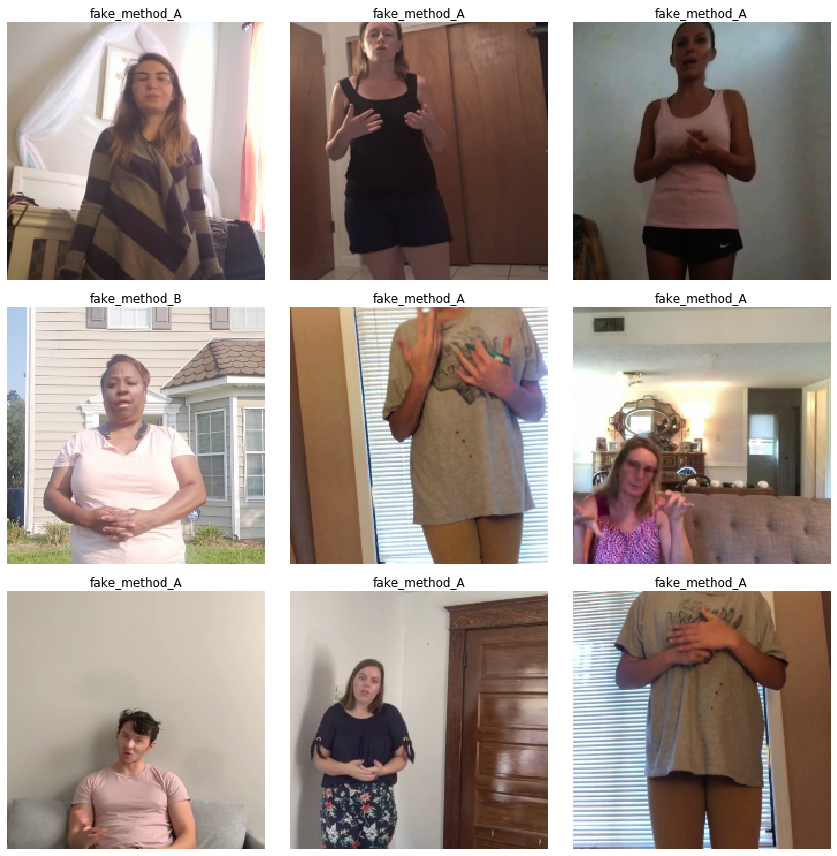

In [0]:
data.show_batch(3)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.427545,0.356218,0.159091,14:02
1,0.146239,0.917461,0.125000,13:16
2,0.098629,0.667488,0.125000,13:22
3,0.098359,0.678426,0.125000,13:25


In [0]:
learn.save('DF-stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


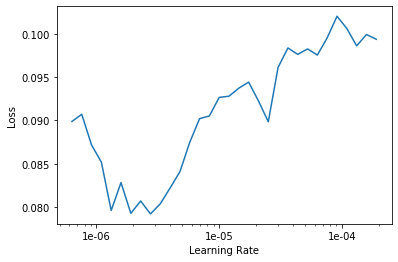

In [0]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-6,8e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.088503,0.712401,0.125000,13:32
1,0.076862,0.706733,0.125000,13:36


In [0]:
learn.save('DF-stage-2')

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 87.7MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.438526,0.620739,0.215909,14:25
1,0.135659,0.923120,0.125000,14:21
2,0.095355,0.687538,0.125000,14:13
3,0.081628,0.722907,0.125000,14:33
